In [2]:
# 📌 Cellule 1 : Imports
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# Pour affichage inline de SHAP
shap.initjs()


In [3]:
# 📌 Cellule 2 : Charger le modèle
model = joblib.load("models/model.pkl")
preprocessor = model.named_steps["preprocessing"]
regressor = model.named_steps["regressor"]

In [4]:
# 📌 Cellule 3 : Entrée manuelle du profil développeur
profile = {
    "Country": "France",
    "Employment": "Employed full-time",
    "RemoteWork": "On-site",
    "EdLevel": "Bachelor’s degree",
    "DevType": "Educator",
    "YearsCodePro": 3
}

df_input = pd.DataFrame([profile])
df_input


,Country,Employment,RemoteWork,EdLevel,DevType,YearsCodePro
0,France,Employed full-time,On-site,Bachelor’s degree,Educator,3


In [5]:
# 📌 Cellule 4 : Prédiction du salaire
prediction = model.predict(df_input)[0]
print(f"💸 Salaire prédit : {round(prediction, 2)} €")


💸 Salaire prédit : 32424.34 €


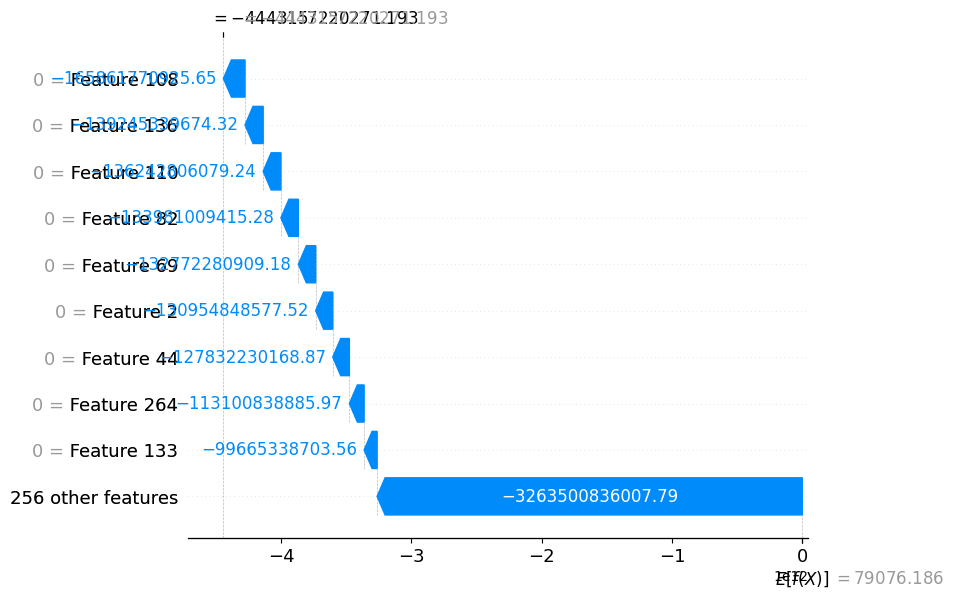

In [6]:
# 📌 Cellule 5 : Explication SHAP locale
X_transformed = preprocessor.transform(df_input).astype("float64")

explainer = shap.Explainer(regressor)
shap_values = explainer(X_transformed, check_additivity=False)

shap.plots.waterfall(shap_values[0], show=True)


In [7]:
# 📌 Cellule 6 : Suggestions basées sur les features négatifs
def get_suggestions(shap_values, features):
    impacts = shap_values.values[0]
    top_indices = sorted(range(len(impacts)), key=lambda i: impacts[i])[:3]
    suggestions = []

    for i in top_indices:
        feat = features[i]
        if "RemoteWork" in feat:
            suggestions.append("💡 Chercher un poste en télétravail")
        elif "DevType" in feat:
            suggestions.append("💡 Se former à un poste développeur plus demandé (full-stack, backend...)")
        elif "Country" in feat:
            suggestions.append("💡 Travailler pour un pays avec meilleure rémunération (en remote)")
        elif "EdLevel" in feat:
            suggestions.append("💡 Compléter la formation par un diplôme plus élevé")
        elif "Employment" in feat:
            suggestions.append("💡 Passer à un emploi stable à temps plein")
    
    return suggestions

feature_names = preprocessor.get_feature_names_out()
tips = get_suggestions(shap_values, feature_names)

print("📌 Suggestions personnalisées pour améliorer ce salaire :\n")
for tip in tips:
    print("-", tip)


📌 Suggestions personnalisées pour améliorer ce salaire :

- 💡 Travailler pour un pays avec meilleure rémunération (en remote)
- 💡 Travailler pour un pays avec meilleure rémunération (en remote)
- 💡 Travailler pour un pays avec meilleure rémunération (en remote)
